In [7]:
%load_ext autoreload
%autoreload 2

import os
import torch.nn as nn

import networks
from process_data import gen_loader, process_load_data
from train_test import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Process and load the audio files
src_dir = os.getcwd()+'\AudioMNIST\AudioMNIST\data'
dst_dir = os.getcwd()+'\ProcessedData'
dataset, labels = process_load_data(src_dir,dst_dir)

Classes: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [5]:
# Create the dataloaders
train_loader, val_loader, test_loader = gen_loader(dataset,train_split=0.8, val_split= 0.1, test_split= 0.1, length = 40)

# of batches in training dataloader: 1500
# of batches in val dataloader: 188
# of batches in test dataloader: 188


Epoch 2: Train Risk = 0.042, Validation Risk = 0.303,Validation Accuracy 0.895
Epoch 4: Train Risk = 0.024, Validation Risk = 0.021,Validation Accuracy 0.994
Epoch 6: Train Risk = 0.013, Validation Risk = 0.041,Validation Accuracy 0.987
Epoch 8: Train Risk = 0.011, Validation Risk = 0.020,Validation Accuracy 0.996
Epoch 10: Train Risk = 0.008, Validation Risk = 0.013,Validation Accuracy 0.996


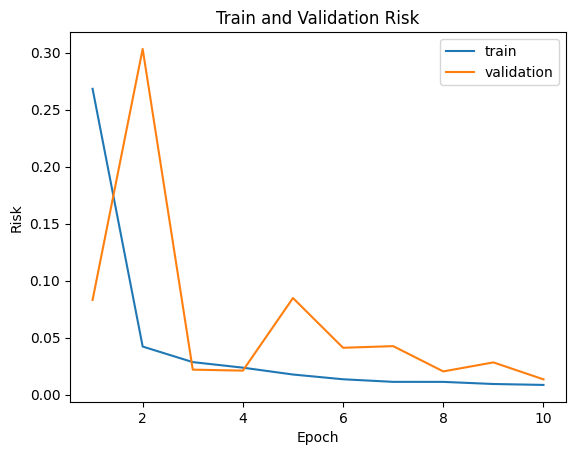

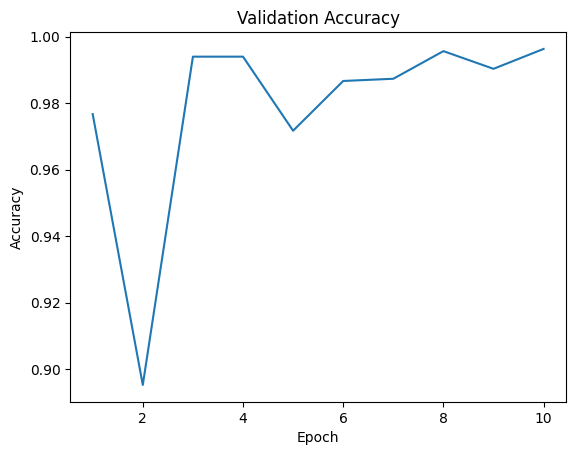

In [ ]:
# Try CNN model
my_CNN = networks.ConvNet(num_classes=10, net_width=16, net_depth=3, net_act='relu', net_norm='batchnorm', net_pooling='maxpooling', in_size = 40)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train(model=my_CNN, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )

In [3]:
# Create the dataloaders
train_loader, val_loader, test_loader = gen_loader(dataset,train_split=0.8, val_split= 0.1, test_split= 0.1)

# of batches in training dataloader: 1500
# of batches in val dataloader: 188
# of batches in test dataloader: 188


Epoch 2: Train Risk = 0.102, Validation Risk = 0.113,Validation Accuracy 0.965
Epoch 4: Train Risk = 0.047, Validation Risk = 0.018,Validation Accuracy 0.997
Epoch 6: Train Risk = 0.031, Validation Risk = 0.026,Validation Accuracy 0.993
Epoch 8: Train Risk = 0.027, Validation Risk = 0.020,Validation Accuracy 0.995
Epoch 10: Train Risk = 0.021, Validation Risk = 0.012,Validation Accuracy 0.997


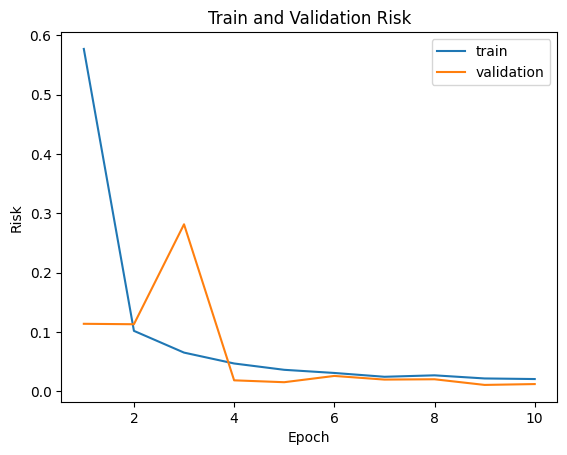

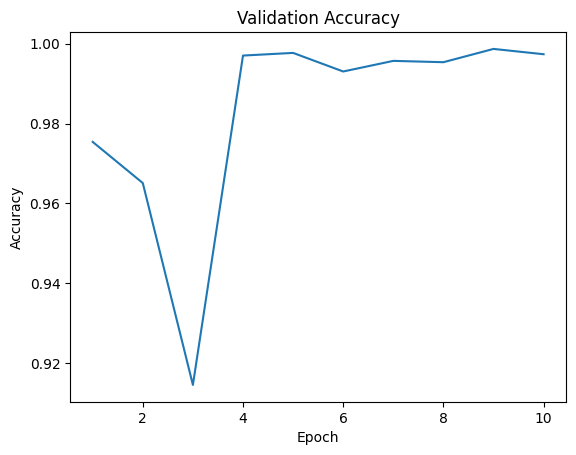

In [32]:
# Try ConvToLSTMNet model
model = networks.ConvToLSTMNet(num_classes=10, cnn_width=16, cnn_depth=3, cnn_act='relu', cnn_norm='batchnorm', cnn_pooling='maxpooling', lstm_width=16, lstm_depth=1, in_size = 40)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train(model=model, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )

In [ ]:
# Try ConvLSTMNet model
model = networks.ConvLSTMNet(num_classes=10, convlstm_width=16, convlstm_kernel_size=1, convlstm_depth=1, in_size=64)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train(model=model, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )

Epoch 2: Train Risk = 2.303, Validation Risk = 2.304,Validation Accuracy 0.091


KeyboardInterrupt: 